In [1]:
import pandas as pd
import numpy as np

all = pd.read_json('./random_tweets.json', lines = True)
print(len(all))

11099


In [7]:
median_retweet_count = np.median(all['retweet_count'])
all['is_viral'] = np.where(all['retweet_count'] > median_retweet_count, 1, 0)

In [6]:
print(all['is_viral'])

0        0
1        0
2        0
3        1
4        1
5        1
6        0
7        1
8        1
9        1
10       0
11       0
12       1
13       0
14       1
15       0
16       1
17       1
18       1
19       1
20       1
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       1
29       0
        ..
11069    1
11070    0
11071    1
11072    1
11073    1
11074    0
11075    1
11076    0
11077    1
11078    0
11079    0
11080    1
11081    0
11082    1
11083    1
11084    0
11085    1
11086    0
11087    1
11088    1
11089    0
11090    0
11091    1
11092    0
11093    1
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64


In [15]:
all['tweet_length'] = all.apply(lambda tweet: len(tweet['text']), axis=1)
all['followers_count'] = all.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all['friends_count'] = all.apply(lambda tweet: tweet['user']['friends_count'], axis=1)


In [9]:
labels = all['is_viral'].tolist()

In [16]:
data = all[['tweet_length', 'followers_count', 'friends_count']]

In [17]:
from sklearn.preprocessing import scale
data = scale(data, axis=0)

/home/parth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k_values=[]
scores=[]
for i in range(1,200):
 model = KNeighborsClassifier(n_neighbors=i)
 model.fit(train_data, train_labels)
 scores.append(model.score(test_data, test_labels))
 k_values.append(i)
print(max(scores))    

0.6187387387387387


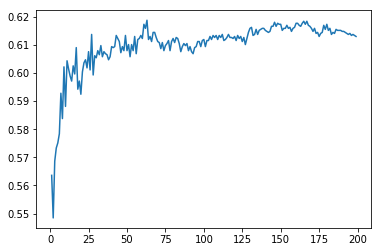

In [37]:
import matplotlib.pyplot as plt
plt.plot(k_values, scores)
plt.show()